## ANALYSIS OF SPENT
### MALL OF EMIRATES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import IPython.core.display as di
# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

In [2]:
df=pd.read_excel('MoE14-16.xlsx', sheetname='Final2')

In [12]:
df.shape;

### Distribution Plots with Kernel Density Estimate 
* Age
* Income
* Spent

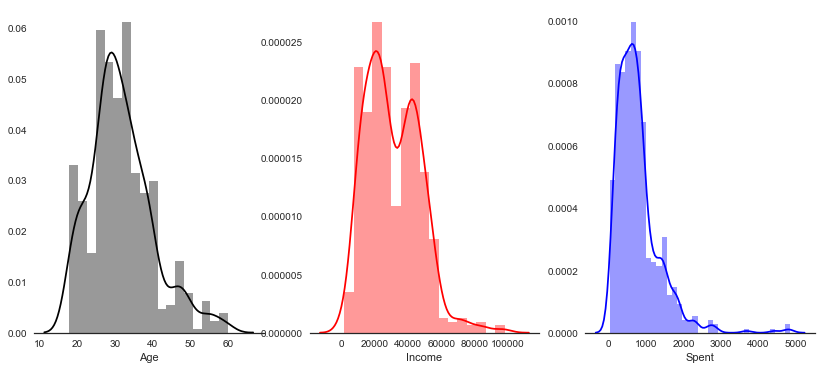

In [3]:
#df0=df[np.abs(df.Spent-df.Spent.mean())<=(3*df.Spent.std())]
#df0=df[np.abs(df.Spent-df.Income.mean())<=(3*df.Spent.std())]
#df0=df[np.abs(df.Spent-df.Age.mean())<=(3*df.Spent.std())]

df1=df.dropna(subset =[['Spent','Year','Age', 'Income']]);
sns.set_style('white')

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(14, 6)

plt.subplot(1,3,1)
sns.distplot(df1['Age'],color='black');
sns.despine(left=True)

plt.subplot(1,3,2)
sns.distplot(df1['Income'],color='red');
sns.despine(left=True)

plt.subplot(1,3,3)
sns.distplot(df1['Spent'],color='b');
sns.despine(left=True)

### Box & Strip Plot of Spent

Skewness: 2.513925
Kurtosis: 11.159539


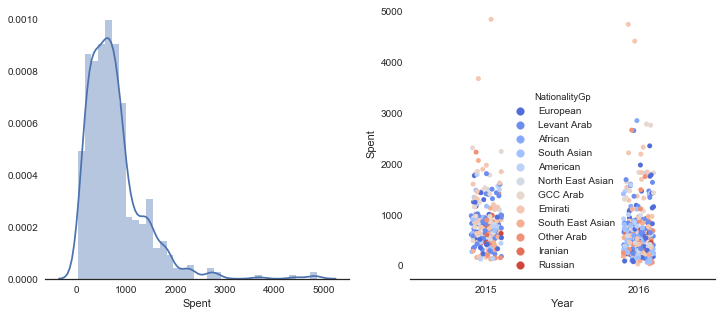

In [4]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.distplot(df1['Spent']);
sns.despine(left=True)

plt.subplot(1,2,2)
sns.stripplot(x='Year',y='Spent', hue='NationalityGp', data=df1, jitter=True, palette='coolwarm')
sns.despine(left=True);

print("Skewness: %f" % df1['Spent'].skew())
print("Kurtosis: %f" % df1['Spent'].kurt())

Top 10 Spent Values

In [5]:
print (df.sort_values(by='Spent',ascending=False).head(10)['Spent'])

143    4957.0
585    4848.0
246    4748.0
283    4418.0
441    3680.0
617    2877.0
356    2854.0
13     2784.0
148    2762.0
240    2666.0
Name: Spent, dtype: float64


In [6]:
df1 = df1[['Spent','Age','Year', 'Promoter score','Income','NationalityGp','Mode','Time of visit', 'Weekday','Res']]

In [8]:
df1.head(3);

### Remove Spent Values more then 03 Std Dev from Mean

In [9]:
df1=df1[np.abs(df1.Spent-df1.Spent.mean())<=(3.3*df1.Spent.std())]
#df1=df1[(df1.Spent < df1.Spent.quantile(.95)) & (df1.Spent > df1.Spent.quantile(0.05))]

In [23]:
df1.shape;

Skewness: 1.168340
Kurtosis: 1.391331


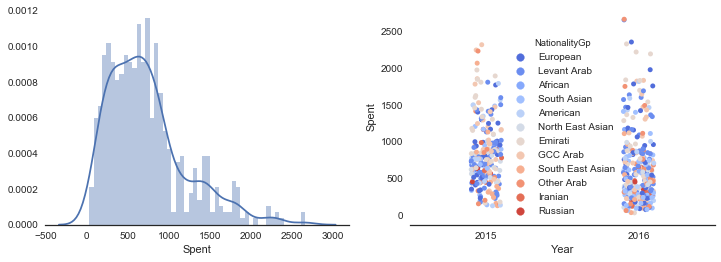

In [10]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.distplot(df1['Spent'], bins=50);
sns.despine(left=True)

plt.subplot(1,2,2)
sns.stripplot(x='Year',y='Spent', hue='NationalityGp', data=df1, jitter=True, palette='coolwarm')
sns.despine(left=True);

print("Skewness: %f" % df1['Spent'].skew())
print("Kurtosis: %f" % df1['Spent'].kurt())

### Response Distribution

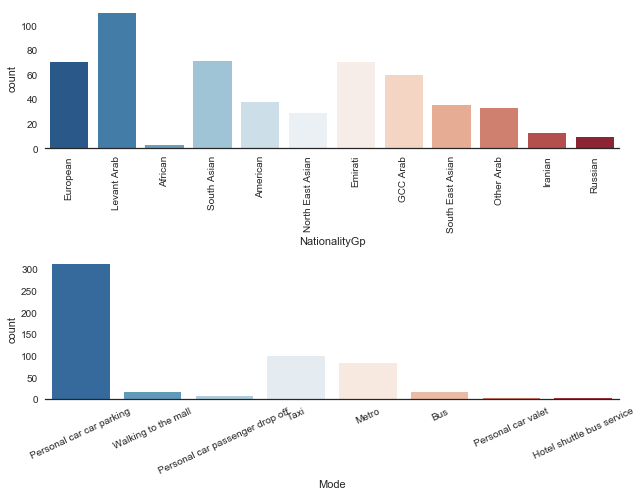

In [12]:
sns.set_style('white')
plt.figure(figsize=(9,7))

plt.subplot(2,1,1)
sns.countplot(df1['NationalityGp'],palette='RdBu_r')
plt.xticks(rotation=90)                                                               
plt.tight_layout()  
sns.despine(left=True)

plt.subplot(2,1,2)
sns.countplot(df1['Mode'],palette='RdBu_r')
plt.xticks(rotation=25)
plt.tight_layout()  
sns.despine(left=True)

In [13]:
df1.NationalityGp.value_counts()

Levant Arab         110
South Asian          71
Emirati              70
European             70
GCC Arab             60
American             38
South East Asian     35
Other Arab           33
North East Asian     29
Iranian              12
Russian               9
African               3
Name: NationalityGp, dtype: int64

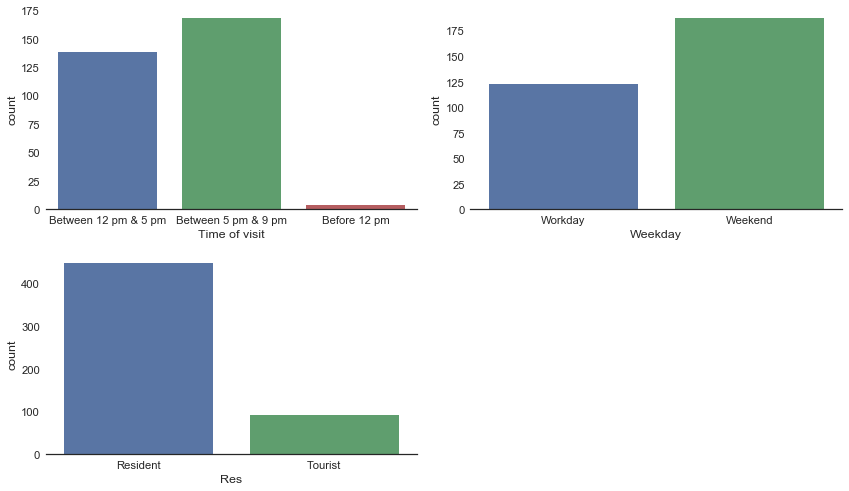

In [14]:
sns.set_style('white')
sns.set_context("paper", font_scale=1.4)   
plt.figure(figsize=(12,7))

plt.subplot(2,2,1)
sns.countplot(df1['Time of visit'])
plt.tight_layout() 
sns.despine(left=True)

plt.subplot(2,2,2)
sns.countplot(df1['Weekday'])
plt.tight_layout() 
sns.despine(left=True)

plt.subplot(2,2,3)
sns.countplot(df1['Res'])
plt.tight_layout() 
sns.despine(left=True)

### Joint Plot (bivariate and univariate graphs) of Income, Age, Spent

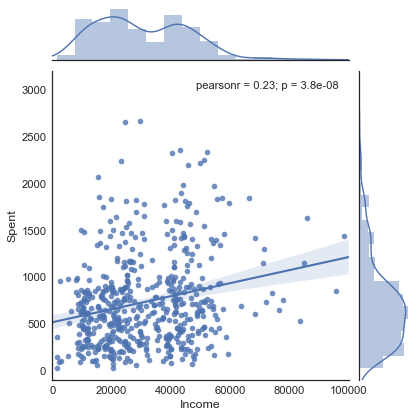

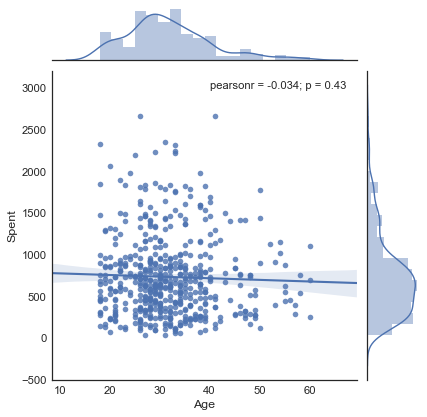

In [17]:
sns.jointplot(x='Income',y='Spent',data=df1,kind='reg', xlim=(-100,100000), ylim=(-100,3200));
sns.jointplot(x='Age',y='Spent',data=df1,kind='reg');

### Spent by Nationalities Group 
(Top 03 Nationalities, South Asian,Levant Arab & Emirati)

In [18]:
df2 = df1[['Spent','Income','NationalityGp','Mode','Time of visit', 'Weekday', 'Res']]
df2=df2[df2['NationalityGp'].isin
    (['South Asian','Levant Arab','Emirati'])];
df2.shape

(251, 7)

## PAIRPLOT
Pairwise relationships Spent & Income w.r.t Nationality

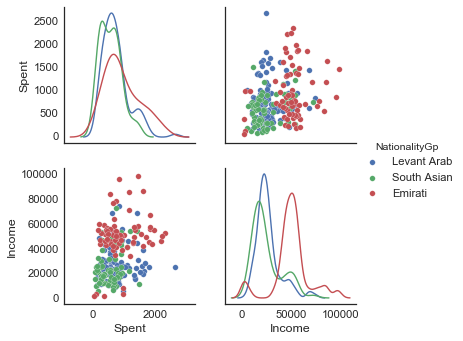

In [20]:
sns.pairplot(df2,hue='NationalityGp',diag_kind='kde' );

## OVERLAPPING KDE PLOTS

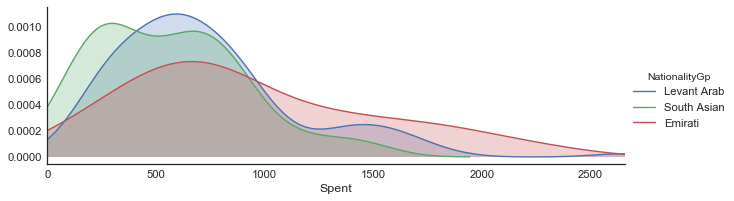

In [21]:
fig = sns.FacetGrid(df2, hue="NationalityGp",aspect=3);
fig.map(sns.kdeplot,'Spent',shade= True);
oldest = df2['Spent'].max();
fig.set(xlim=(0,oldest));
fig.add_legend();

### Regression Plot
Plot data and regression model fits across a FacetGrid.

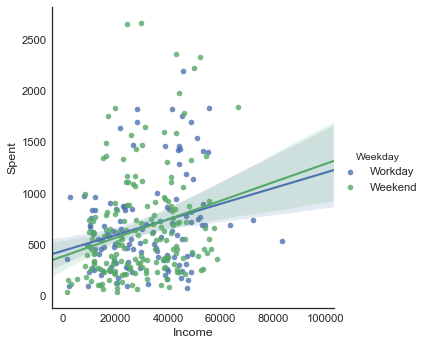

In [22]:
sns.lmplot(x="Income", y="Spent", hue="Weekday", data=df1);

## FACTOR PLOT
Draw a categorical plot onto a FacetGrid

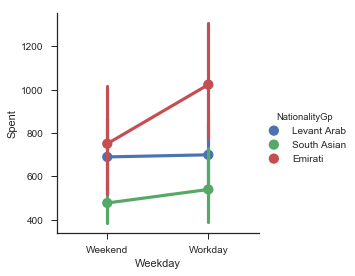

In [49]:
sns.set(style="ticks")
sns.factorplot('Weekday','Spent',hue='NationalityGp',data=df2);

## STRIP PLOT

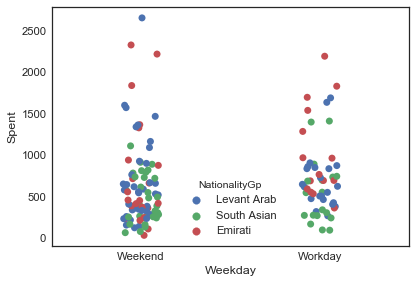

In [23]:
sns.stripplot(x="Weekday", y="Spent", hue='NationalityGp', data=df2, size=7, jitter=True);

## BOX PLOTS

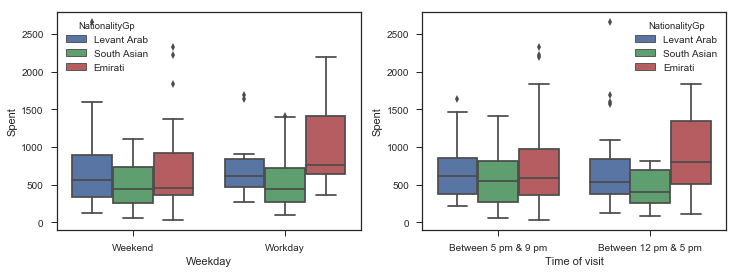

In [51]:
df2=df2[df2['Time of visit'].isin
    (['Between 12 pm & 5 pm','Between 5 pm & 9 pm'])];

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.boxplot(x="Weekday", y="Spent", hue="NationalityGp", data=df2);

plt.subplot(1,2,2)
sns.boxplot(x="Time of visit", y="Spent", hue="NationalityGp", data=df2);

### Spent by Mode of Transport
(Personal Car, Metro & Taxi)

In [25]:
df3= df1[['Spent','Income','NationalityGp','Mode','Time of visit','Weekday']]
df3=df3[df3['Mode'].isin
    (['Personal car car parking','Metro','Taxi'])];
df3.shape

(494, 6)

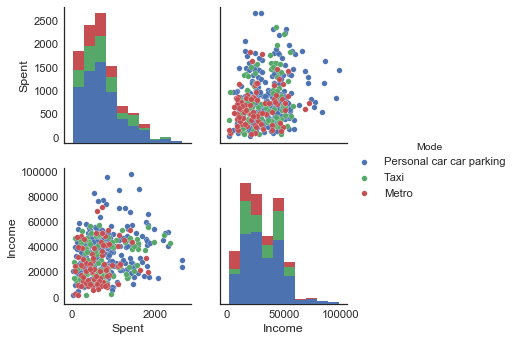

In [26]:
sns.pairplot(df3,kind='scatter', hue='Mode');

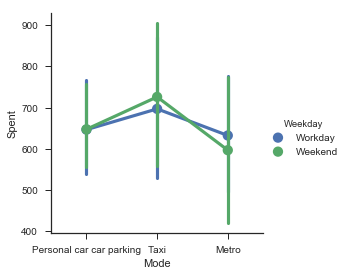

In [27]:
sns.set(style="ticks")
sns.factorplot('Mode','Spent',hue='Weekday',data=df3);

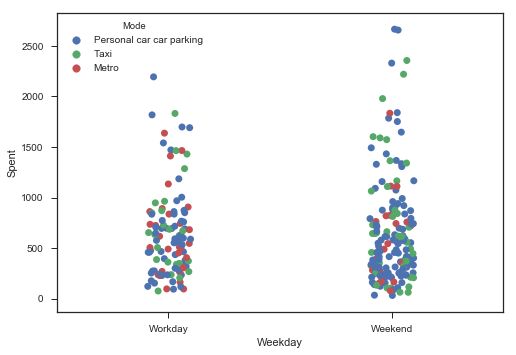

In [28]:
sns.stripplot(x="Weekday", y="Spent", hue='Mode', data=df3, size=7, jitter=True);

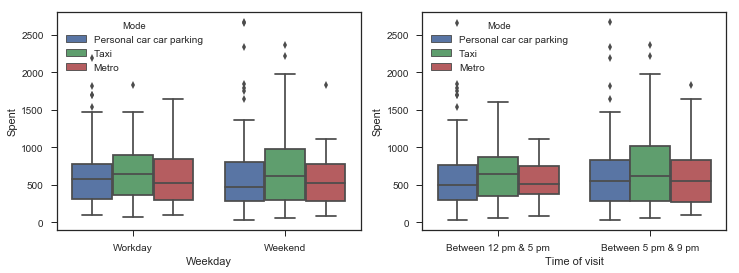

In [32]:
df3=df3[df3['Time of visit'].isin
    (['Between 12 pm & 5 pm','Between 5 pm & 9 pm'])];

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.boxplot(x="Weekday", y="Spent", hue="Mode", data=df3);

plt.subplot(1,2,2)
sns.boxplot(x="Time of visit", y="Spent", hue="Mode", data=df3);

## Facet Grid

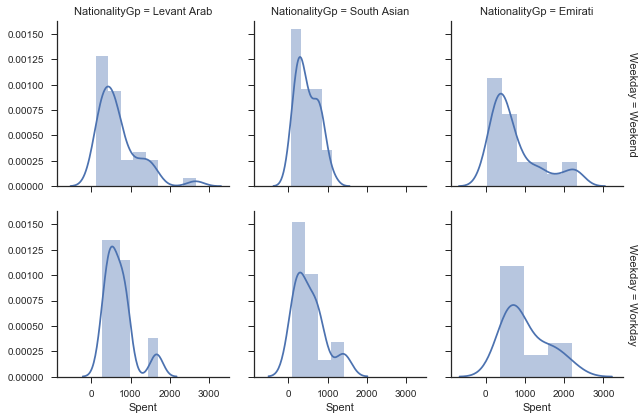

In [33]:
g = sns.FacetGrid(df2, col="NationalityGp", row="Weekday", margin_titles=True)
g = g.map(sns.distplot, "Spent");

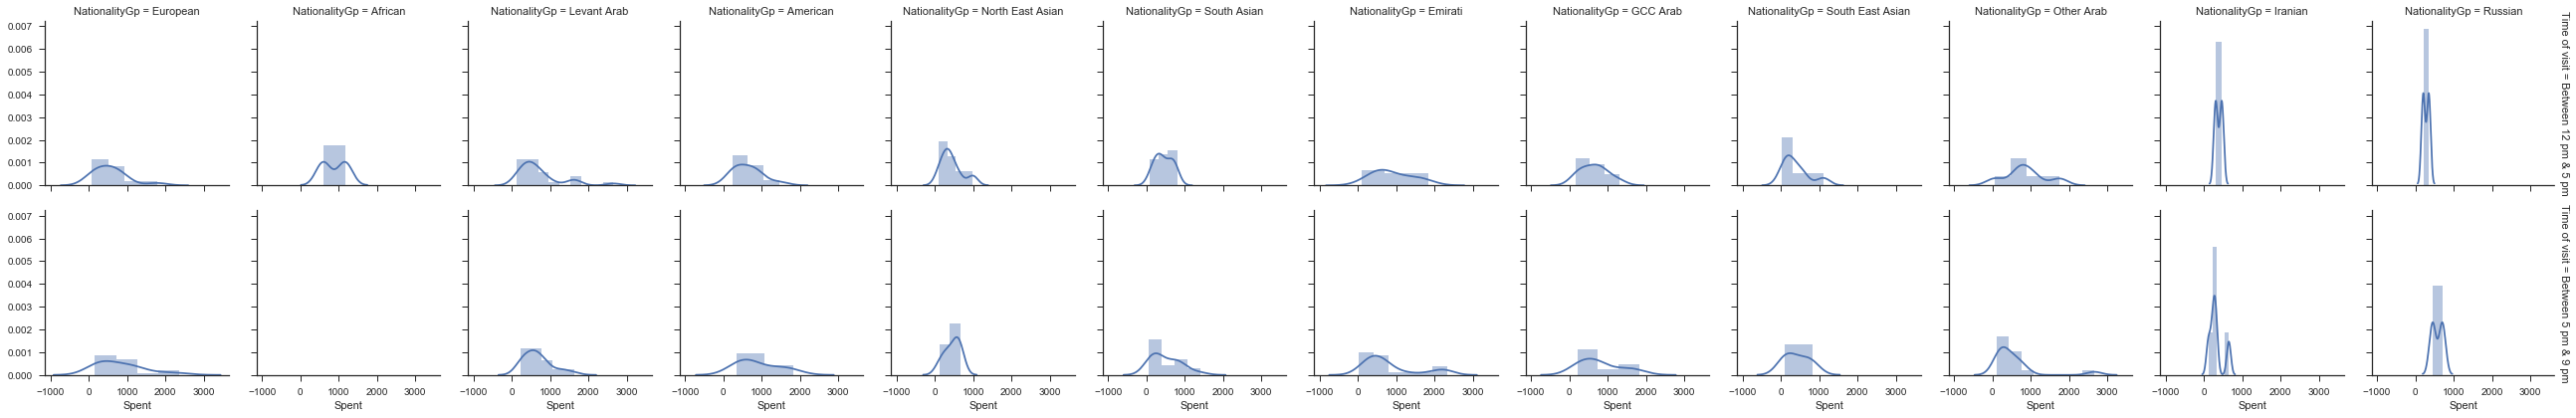

In [34]:
g = sns.FacetGrid(df3, col="NationalityGp", row="Time of visit", margin_titles=True)
g = g.map(sns.distplot, "Spent");